# Data Cleaning and the Machine Learning Workflow
Dawit Aklilu

In [60]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**EXERCISE 0:** Link your Google Drive.

In [61]:
# # GOOGLE DRIVE SET UP
# from google.colab import drive
# # Mount my Google Drive
# drive.mount('/content/gdrive')

In [62]:
data_dir = '/content/gdrive/My Drive/Colab Notebooks/'

**EXERCISE 1:** Import the `vehivles_small.csv` data set as a Pandas Dataframe and print the Dataframe. This data set is a shortened verions of [this data set](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?resource=download) taken from Kaggle.com.

In [63]:
# vehicle_df = pd.read_csv(data_dir+"vehicles_small.csv")
# vehicle_df
vehicle_df = pd.read_csv("vehicles_small.csv")
vehicle_df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,262922,7313427491,https://santafe.craigslist.org/ctd/d/santa-fe-...,santa fe / taos,https://santafe.craigslist.org,9950,2013.0,ford,focus,like new,4 cylinders,gas,95000.0,clean,automatic,1FADP3K20DL139407,fwd,NaN,hatchback,white,https://images.craigslist.org/00R0R_hcVfzCCqmN...,1 OWNER! Automatic Transmission 2.0L 4 Cylind...,NaN,nm,35.650400,-106.000200,2021-04-27T11:52:53-0600
1,119600,7314311823,https://treasure.craigslist.org/ctd/d/vero-bea...,treasure coast,https://treasure.craigslist.org,39500,2016.0,gmc,yukon xl denali,excellent,8 cylinders,gas,91351.0,clean,automatic,NaN,4wd,NaN,SUV,NaN,https://images.craigslist.org/00202_btbztUwCbQ...,"Mileage: 91,351 Body: SUV Drivetrain: 4X4 Exte...",NaN,fl,27.588500,-80.392300,2021-04-29T11:00:14-0400
2,293948,7307759238,https://cleveland.craigslist.org/ctd/d/rocky-r...,cleveland,https://cleveland.craigslist.org,24329,2018.0,gmc,terrain,NaN,4 cylinders,gas,14598.0,clean,automatic,NaN,4wd,mid-size,SUV,brown,https://images.craigslist.org/01010_lExB4IQYsR...,Most common questions about this vehicle: Wan...,NaN,oh,41.456783,-81.883689,2021-04-16T12:22:01-0400
3,254392,7314342138,https://newjersey.craigslist.org/ctd/d/newark-...,north jersey,https://newjersey.craigslist.org,12300,2016.0,mitsubishi,outlander se,excellent,4 cylinders,gas,107071.0,clean,automatic,JA4AZ3A3XGZ016260,4wd,full-size,SUV,silver,https://images.craigslist.org/01313_gvBriFOQwC...,🔥2016 MITSUBISHI OUTLANDER SE 🔥CLEAN TITLE 🔥$1...,NaN,nj,40.728887,-74.150686,2021-04-29T11:52:17-0400
4,116669,7316531721,https://tampa.craigslist.org/hil/ctd/d/tampa-2...,tampa bay area,https://tampa.craigslist.org,19995,2015.0,chevrolet,silverado,NaN,NaN,gas,213013.0,clean,NaN,3GCPCREC0FG351282,rwd,NaN,pickup,black,https://images.craigslist.org/00R0R_5backjRURS...,2015 Chevrolet Chevy Silverado 1500 LT Crew Ca...,NaN,fl,27.999033,-82.459702,2021-05-03T20:40:33-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,250572,7312817736,https://cnj.craigslist.org/ctd/d/trenton-2017-...,central NJ,https://cnj.craigslist.org,31590,2017.0,bmw,4 series 440i gran coupe 4d,good,NaN,gas,34455.0,clean,other,WBA4E3C55HG186971,rwd,NaN,coupe,blue,https://images.craigslist.org/00G0G_2CDb9LdMkM...,Carvana is the safer way to buy a car During t...,NaN,nj,40.220000,-74.760000,2021-04-26T11:30:52-0400
49996,204486,7311921134,https://kalamazoo.craigslist.org/ctd/d/chesani...,kalamazoo,https://kalamazoo.craigslist.org,5495,2010.0,chrysler,town & country,NaN,NaN,gas,144909.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00v0v_jw0ikGAyNn...,WE HAVE OVER 350 VEHICLES IN STOCK! View Our...,NaN,mi,43.182400,-84.112200,2021-04-24T12:49:30-0400
49997,366950,7307119394,https://brownsville.craigslist.org/ctd/d/alamo...,brownsville,https://brownsville.craigslist.org,51495,2019.0,infiniti,qx80,NaN,NaN,gas,23193.0,clean,automatic,JN8AZ2NF9K9683810,NaN,NaN,NaN,white,https://images.craigslist.org/00E0E_4m2Lqi60hQ...,Jaguar Land Rover of San Juan address: 601 ...,NaN,tx,26.193466,-98.145378,2021-04-15T08:01:24-0500
49998,271655,7307657039,https://ithaca.craigslist.org/ctd/d/spencerpor...,ithaca,https://ithaca.craigslist.org,14995,2013.0,ford,econoline cargo van,good,8 cylinders,other,118198.0,clean,automatic,1FTNS2EW2DDB26075,rwd,NaN,van,silver,https://images.craigslist.org/00g0g_aPschTIyMK...,Why Buy From Twin Work Vans?Twin Work Vans is ...,NaN,ny,43.220454,-77.819038,2021-04-16T09:40:31-0400


In [64]:
pd.set_option("display.max.columns", None)

In [65]:
type(vehicle_df)

pandas.core.frame.DataFrame

**EXERCISE 2:** There are many features in this data set, but we are only interested in the following: price, year, manufacturer, condition, odometer, type, and paint color. Since this is a very large data set, removing the columns containing the other features will speed up this process. Do this in the cell below. Once you are done the Dataframe should only have 7 columns. Print it out to prove this.

In [66]:
vehicle_df.info

<bound method DataFrame.info of        Unnamed: 0          id  \
0          262922  7313427491   
1          119600  7314311823   
2          293948  7307759238   
3          254392  7314342138   
4          116669  7316531721   
...           ...         ...   
49995      250572  7312817736   
49996      204486  7311921134   
49997      366950  7307119394   
49998      271655  7307657039   
49999      143996  7311629600   

                                                     url              region  \
0      https://santafe.craigslist.org/ctd/d/santa-fe-...     santa fe / taos   
1      https://treasure.craigslist.org/ctd/d/vero-bea...      treasure coast   
2      https://cleveland.craigslist.org/ctd/d/rocky-r...           cleveland   
3      https://newjersey.craigslist.org/ctd/d/newark-...        north jersey   
4      https://tampa.craigslist.org/hil/ctd/d/tampa-2...      tampa bay area   
...                                                  ...                 ...   
49995  http

In [67]:
vehicle_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50000 non-null  int64  
 1   id            50000 non-null  int64  
 2   url           50000 non-null  object 
 3   region        50000 non-null  object 
 4   region_url    50000 non-null  object 
 5   price         50000 non-null  int64  
 6   year          49878 non-null  float64
 7   manufacturer  47880 non-null  object 
 8   model         49404 non-null  object 
 9   condition     29513 non-null  object 
 10  cylinders     28996 non-null  object 
 11  fuel          49649 non-null  object 
 12  odometer      49517 non-null  float64
 13  title_status  49085 non-null  object 
 14  transmission  49701 non-null  object 
 15  VIN           31224 non-null  object 
 16  drive         34542 non-null  object 
 17  size          13975 non-null  object 
 18  type          39158 non-nu

In [68]:
vehicle_df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,50000.000000,5.000000e+04,5.000000e+04,49878.000000,4.951700e+04,0.0,49188.000000,49188.000000
mean,213085.670420,7.311467e+09,1.030437e+05,2011.242772,9.733696e+04,NaN,38.494244,-94.704712
std,123484.298114,4.500267e+06,1.435782e+07,9.405396,2.009795e+05,NaN,5.797133,18.284048
min,2.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-56.527029,-159.486600
25%,106097.750000,7.308095e+09,5.950000e+03,2008.000000,3.720000e+04,NaN,34.708815,-111.954863
50%,213482.500000,7.312580e+09,1.398800e+04,2013.000000,8.550000e+04,NaN,39.150100,-88.241072
75%,319947.250000,7.315245e+09,2.633150e+04,2017.000000,1.340000e+05,NaN,42.378530,-80.818725
max,426874.000000,7.317099e+09,3.009549e+09,2022.000000,1.000000e+07,NaN,82.390818,94.163200


In [69]:
# vehicle_df.description

In [70]:
vehicle_df.head

<bound method NDFrame.head of        Unnamed: 0          id  \
0          262922  7313427491   
1          119600  7314311823   
2          293948  7307759238   
3          254392  7314342138   
4          116669  7316531721   
...           ...         ...   
49995      250572  7312817736   
49996      204486  7311921134   
49997      366950  7307119394   
49998      271655  7307657039   
49999      143996  7311629600   

                                                     url              region  \
0      https://santafe.craigslist.org/ctd/d/santa-fe-...     santa fe / taos   
1      https://treasure.craigslist.org/ctd/d/vero-bea...      treasure coast   
2      https://cleveland.craigslist.org/ctd/d/rocky-r...           cleveland   
3      https://newjersey.craigslist.org/ctd/d/newark-...        north jersey   
4      https://tampa.craigslist.org/hil/ctd/d/tampa-2...      tampa bay area   
...                                                  ...                 ...   
49995  https:

In [71]:
# vehicle_df.fillna(value= "False",inplace=True)

In [72]:
vehicle_df.isnull()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,True,True,True,False,False,True,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


In [73]:
vehicle_df.isna().values.any()

True

In [74]:
vehicle_df.isna().any()
#before I dropped all those other cols, everything was false, after, I had true for many cols

Unnamed: 0      False
id              False
url             False
region          False
region_url      False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
image_url        True
description      True
county           True
state           False
lat              True
long             True
posting_date     True
dtype: bool

In [75]:
# print("Check for Null Values", possum_data.isnull().values.any())
# possum_data = possum_data.dropna()


# price, year, manufacturer, condition, odometer, type, and paint color

In [76]:
# vehicle_df = vehicle_df.dropna()

# When I ran this code, everything was delted in the df

In [77]:
new_vehicle_df = vehicle_df.drop(['id', 'url','region','region_url','model','cylinders','fuel','title_status','transmission','VIN','drive','size',
                 'image_url','description','county','state','lat','long',
                 'posting_date'], axis=1)

#This does not work unless I set the axis parameter to 1(why is this?)

In [78]:
new_vehicle_df


,Unnamed: 0,price,year,manufacturer,condition,odometer,type,paint_color
0,262922,9950,2013.0,ford,like new,95000.0,hatchback,white
1,119600,39500,2016.0,gmc,excellent,91351.0,SUV,NaN
2,293948,24329,2018.0,gmc,NaN,14598.0,SUV,brown
3,254392,12300,2016.0,mitsubishi,excellent,107071.0,SUV,silver
4,116669,19995,2015.0,chevrolet,NaN,213013.0,pickup,black
...,...,...,...,...,...,...,...,...
49995,250572,31590,2017.0,bmw,good,34455.0,coupe,blue
49996,204486,5495,2010.0,chrysler,NaN,144909.0,NaN,NaN
49997,366950,51495,2019.0,infiniti,NaN,23193.0,NaN,white
49998,271655,14995,2013.0,ford,good,118198.0,van,silver


In [79]:
new_vehicle_df.head()

,Unnamed: 0,price,year,manufacturer,condition,odometer,type,paint_color
0,262922,9950,2013.0,ford,like new,95000.0,hatchback,white
1,119600,39500,2016.0,gmc,excellent,91351.0,SUV,NaN
2,293948,24329,2018.0,gmc,NaN,14598.0,SUV,brown
3,254392,12300,2016.0,mitsubishi,excellent,107071.0,SUV,silver
4,116669,19995,2015.0,chevrolet,NaN,213013.0,pickup,black


In [80]:
# new_vehicle_df = vehicle_df[vehicle_df[""]=='']
# Masks are a way to create a smaller Dataframe where only certain conditions are true. We do this by putting a conditional expression
 #(an expression that evaluates to either True or False) after the name of the Dataframe.
 #Only the rows of the Dataframe that result in a True value will be returned

In [81]:
# vehicle_df.fillna(value=False, method=None, axis=None, inplace=False, limit=None, downcast=None)

**EXERCISE 3:** Check to see if the Dataframe contains any null values (NaN). If it does, remove the entire row containing the null value.  How many data points did you remove with this method?

In [82]:
new_vehicle_df.isnull().any()

Unnamed: 0      False
price           False
year             True
manufacturer     True
condition        True
odometer         True
type             True
paint_color      True
dtype: bool

In [83]:
new_vehicle_df.isnull().sum().any()

True

In [84]:
new_df = new_vehicle_df.dropna

In [85]:
new_df

<bound method DataFrame.dropna of        Unnamed: 0  price    year manufacturer  condition  odometer       type  \
0          262922   9950  2013.0         ford   like new   95000.0  hatchback   
1          119600  39500  2016.0          gmc  excellent   91351.0        SUV   
2          293948  24329  2018.0          gmc        NaN   14598.0        SUV   
3          254392  12300  2016.0   mitsubishi  excellent  107071.0        SUV   
4          116669  19995  2015.0    chevrolet        NaN  213013.0     pickup   
...           ...    ...     ...          ...        ...       ...        ...   
49995      250572  31590  2017.0          bmw       good   34455.0      coupe   
49996      204486   5495  2010.0     chrysler        NaN  144909.0        NaN   
49997      366950  51495  2019.0     infiniti        NaN   23193.0        NaN   
49998      271655  14995  2013.0         ford       good  118198.0        van   
49999      143996  20950  2013.0    chevrolet  excellent   94952.0      tru

In [86]:
new_df = new_vehicle_df.dropna()
new_df

,Unnamed: 0,price,year,manufacturer,condition,odometer,type,paint_color
0,262922,9950,2013.0,ford,like new,95000.0,hatchback,white
3,254392,12300,2016.0,mitsubishi,excellent,107071.0,SUV,silver
6,94681,64900,2019.0,audi,excellent,21846.0,SUV,black
7,346298,19990,2019.0,kia,good,30590.0,wagon,white
9,543,10900,2010.0,honda,good,97804.0,wagon,grey
...,...,...,...,...,...,...,...,...
49990,191930,3250,2011.0,subaru,good,212000.0,hatchback,black
49992,189012,45590,2018.0,mercedes-benz,good,5277.0,coupe,white
49995,250572,31590,2017.0,bmw,good,34455.0,coupe,blue
49998,271655,14995,2013.0,ford,good,118198.0,van,silver


In [87]:
# x.isnull().sum()

In [88]:
# x.isnull().any()

In [89]:
new_vehicle_df.isnull()

,Unnamed: 0,price,year,manufacturer,condition,odometer,type,paint_color
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False
49996,False,False,False,False,True,False,True,True
49997,False,False,False,False,True,False,True,False
49998,False,False,False,False,False,False,False,False


In [90]:
print(new_vehicle_df.keys())
print(new_vehicle_df.info())

#this returns the col headings and the col values(like a dictionary)

Index(['Unnamed: 0', 'price', 'year', 'manufacturer', 'condition', 'odometer',
       'type', 'paint_color'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50000 non-null  int64  
 1   price         50000 non-null  int64  
 2   year          49878 non-null  float64
 3   manufacturer  47880 non-null  object 
 4   condition     29513 non-null  object 
 5   odometer      49517 non-null  float64
 6   type          39158 non-null  object 
 7   paint_color   34902 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB
None


In [91]:

#data types for cols and non_null count

In [92]:
new_vehicle_df.shape

(50000, 8)

In [93]:
new_df.shape

(20555, 8)

In [94]:
new_df['price'].describe

<bound method NDFrame.describe of 0         9950
3        12300
6        64900
7        19990
9        10900
         ...  
49990     3250
49992    45590
49995    31590
49998    14995
49999    20950
Name: price, Length: 20555, dtype: int64>

In [95]:
# If a data set has to be all numbers, do you have to change certain cols to numerical like week 1 inclass

**EXERCISE 4:** Create a plot of price as a function of the odometer reading using either Matplotlib or Seaborn. Comment on the appearance of the graph after you make it.

In [96]:
# for col in new_vehicle_df:
#     plt.plot(new_vehicle_df[col])
#     plt.title(col)
#     plt.show()

In [97]:
# plt.figure(figsize=(10,10))
# plt.plot(['price'],['odometer'])
# plt.show()

In [98]:
new_df.value_counts()

Unnamed: 0  price  year    manufacturer  condition  odometer  type       paint_color
40          30990  2016.0  chevrolet     good       34940.0   pickup     blue           1
275598      37590  2015.0  porsche       good       61163.0   other      white          1
276715      29590  2019.0  bmw           good       28115.0   coupe      black          1
276683      3600   2012.0  chevrolet     like new   130000.0  hatchback  grey           1
276680      39500  2014.0  porsche       like new   55900.0   hatchback  white          1
                                                                                       ..
142991      63990  2019.0  audi          good       20126.0   other      black          1
142989      43990  2020.0  buick         good       2212.0    other      black          1
142967      27990  2019.0  infiniti      good       32042.0   SUV        blue           1
142960      27590  2016.0  ram           good       64791.0   pickup     black          1
426874      335

In [99]:
corr = new_df.corr()

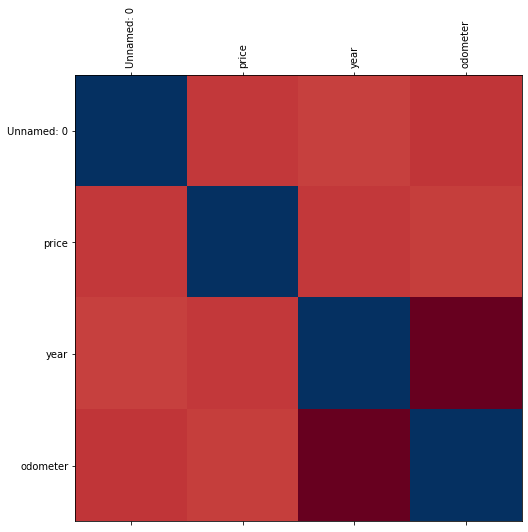

In [100]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);
#darkred is negative corr
# high corr is blue


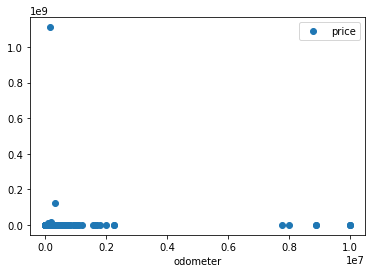

In [101]:
new_df.plot(x='odometer',y='price',style='o')
plt.xlabel=('odometer')
plt.ylabel=('price')
plt.show()
#This is sucks 

<AxesSubplot:xlabel='odometer', ylabel='price'>

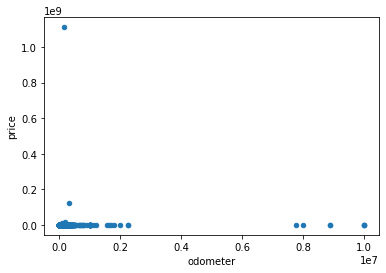

In [102]:
new_df.plot(kind='scatter',x='odometer',y='price')

Make a mask for this

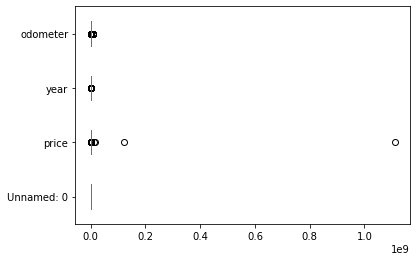

In [103]:
new_df.plot(kind='box',vert=False)

#vert= False makes it horizontal
xlim=1000
ylim=1000
plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.135,0.125;0.755x0.755)


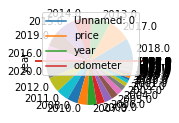

In [104]:
print(new_df.plot(kind='density',figsize=(2,2)))
print(new_df['year'].value_counts().plot(kind='pie'))
#this stacks 2 graphs on top of each other ?how do I sperate them but execute on one line?

<AxesSubplot:ylabel='year'>

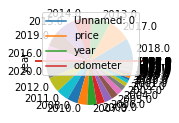

In [105]:
new_df.plot(kind='density',figsize=(2,2))
new_df['year'].value_counts().plot(kind='pie')

AxesSubplot(0.260833,0.125;0.503333x0.755)


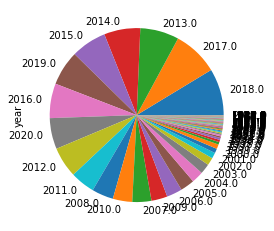

In [106]:
print(new_df['year'].value_counts().plot(kind='pie'))

In [107]:
new_df.describe()
#the max is too high

,Unnamed: 0,price,year,odometer
count,20555.000000,2.055500e+04,20555.000000,2.055500e+04
mean,210112.178302,7.960007e+04,2011.331209,9.294856e+04
std,121445.410589,7.798833e+06,8.998733,1.843143e+05
min,40.000000,0.000000e+00,1925.000000,0.000000e+00
25%,104161.500000,6.995000e+03,2008.000000,3.173900e+04
50%,210826.000000,1.514900e+04,2013.000000,7.993700e+04
75%,309016.500000,2.790000e+04,2017.000000,1.324545e+05
max,426874.000000,1.111111e+09,2022.000000,9.999999e+06


**EXERCISE 5:** You should notice that there are outliers both in the price dimension and in the odometer dimension (or at least what graphically appears to be outliers). Print out the minimum, maximum, and average for the price data set and the odometer data set. Do the mininim and maximum values seem reasonable?  Another important aspect of data cleaning outside of just removing missing and not needed data is making sure that the data that is present is reasonable and relatively error free.

new_df = pd.DataFrame(boolean_mask.astype(int))

In [108]:
new_df_mask = (new_df['price'] < 100000) & (new_df['odometer'] < 100000)
print(new_df_mask.head())
print(new_df_mask.describe())

0     True
3    False
6     True
7     True
9     True
dtype: bool
count     20555
unique        2
top        True
freq      12260
dtype: object


In [109]:
Applied_new_df = new_df[new_df_mask]
#to actually aply the mask you need to put do ====>   new_df[new_df_mask] -> this applies the mask to new_df 

In [110]:
# Applied_new_df = Applied_new_df.loc[(Applied_new_df!=0).any(axis=1)] #axis=1 drops col and axis=0 drops rows
# This drops all cols with 0 

In [111]:
Applied_new_df.describe()

,Unnamed: 0,price,year,odometer
count,12260.000000,12260.000000,12260.000000,12260.000000
mean,208317.669902,23724.720962,2013.824633,44080.342170
std,122016.939276,13316.596745,9.370029,29009.740298
min,40.000000,0.000000,1925.000000,0.000000
25%,101140.250000,14590.000000,2013.000000,19511.000000
50%,206729.500000,23590.000000,2016.000000,39219.000000
75%,307439.500000,32990.000000,2018.000000,69748.500000
max,426874.000000,99950.000000,2022.000000,99999.000000


In [112]:
# new_df_mask_1 = pd.DataFrame(new_df_mask)
#how to change back into a dataframe

**EXERCISE 6:** If a point is an outlier in either price or odometer reading, remove the entire row from the Dataframe. There are many ways to find outliers and you can use any method you know from statistics courses or that you can find online **as long as you can explain how it works**.

**EXERCISE 7:** Recreate the price vs. odometer plot again to ensure that the outliers have been removed. How many data points are we left with?

<AxesSubplot:xlabel='odometer', ylabel='price'>

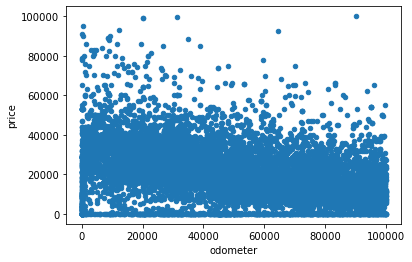

In [113]:
Applied_new_df.plot(kind='scatter',x='odometer',y='price')

<AxesSubplot:xlabel='odometer', ylabel='price'>

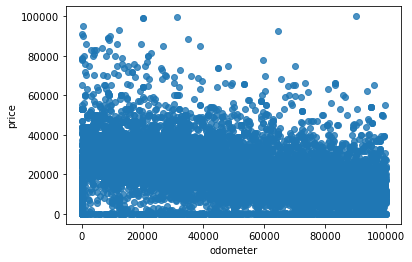

In [118]:
sns.regplot(x='odometer',y='price',data=Applied_new_df)

We have now cleaned and formated the data according to the price vs. odometer relationship, but we still have several columns of data we have not touched. These columns contain non-numeric data which will need to be converted into numeric values before we can use them in any type of data science or machine learning code. We will learn how to do this next week when we talk about machine learning for classification problems.

## Part 2: The Machine Learning Workflow

**Exercise 8:** Describe the steps that are needed to analyze a data set with machine learning.

**Exercise 9:** On September 8th you will have to turn in an initial proposal for you final project. Do you currently have any ideas on what you would what to do? Do you need help coming up with a project topic?

## Notebook Submission

Once you have completed this notebook, submit it on D2L.  Convert the notebook to a PDF using File > Print > Save as PDF.  Make sure all code outputs including graphs are visible on the PDF.